In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [57]:
df=pd.read_csv(r"diamonds.csv")

In [58]:
df.head(25000)

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,1.54,Ideal,G,VS2,60.2,59.0,13508,7.47,7.52,4.51
24996,24997,2.20,Ideal,I,SI2,62.2,56.0,13512,8.33,8.29,5.17
24997,24998,1.50,Premium,E,VS1,60.1,60.0,13513,7.42,7.48,4.48
24998,24999,1.51,Good,G,VS1,62.4,59.0,13515,7.25,7.28,4.53


In [59]:
df.shape

(53940, 11)

In [60]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [61]:
df.drop(['id'],axis=1,inplace=True)

In [62]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [63]:
max(df['price'])

18823

In [64]:
max(df['cut'])

'Very Good'

In [65]:
max(df['color'])

'J'

Exploratory Data Analysis

<AxesSubplot:xlabel='cut', ylabel='price'>

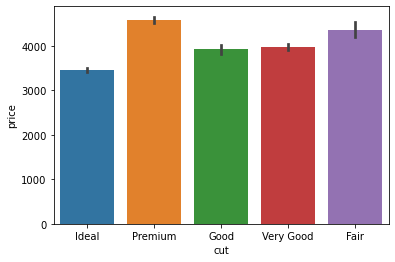

In [66]:
sns.barplot(data=df,x=df['cut'],y=df['price'])

<AxesSubplot:xlabel='carat', ylabel='price'>

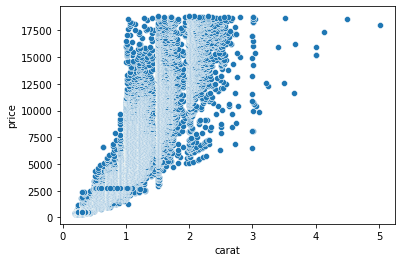

In [67]:
sns.scatterplot(data=df,x='carat',y='price')

<AxesSubplot:xlabel='carat', ylabel='price'>

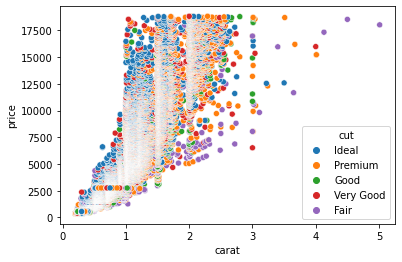

In [68]:
sns.scatterplot(data=df,x='carat',y='price',hue='cut')

In [69]:
# df['cut'].unique()
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<AxesSubplot:xlabel='carat', ylabel='price'>

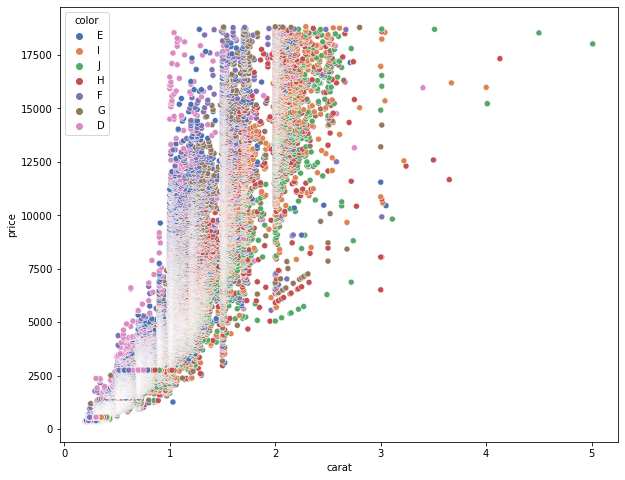

In [70]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x='carat',y='price',hue='color',palette='deep')

<AxesSubplot:xlabel='color', ylabel='price'>

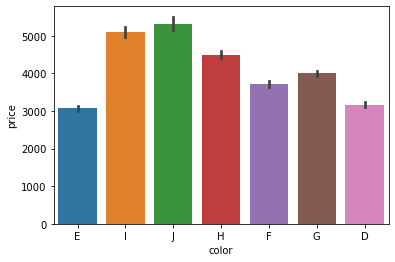

In [71]:
sns.barplot(data=df,x=df['color'],y=df['price'])

In [72]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<AxesSubplot:xlabel='clarity', ylabel='price'>

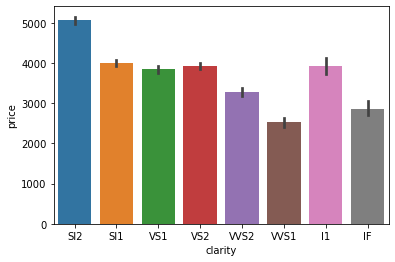

In [73]:
sns.barplot(data=df,x=df['clarity'],y=df['price'])

Data Preprocessing

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [75]:
from sklearn import preprocessing

In [76]:
le=preprocessing.LabelEncoder()

In [77]:
df['cut']=le.fit_transform(df['cut'])

In [78]:
df['cut'].unique()

array([2, 3, 1, 4, 0])

In [79]:
df['color']=le.fit_transform(df['color'])

In [80]:
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [81]:
df['clarity']=le.fit_transform(df['clarity'])

In [82]:
df['clarity'].unique()

array([3, 2, 4, 5, 7, 6, 0, 1])

In [83]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


Machine Learning Model Building

In [84]:
x=df.drop('price',axis=1)

In [85]:
y=df['price']

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=2)

Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [89]:
rf=RandomForestRegressor()
rf.fit(x_tr,y_tr)

RandomForestRegressor()

In [90]:
y_pred=rf.predict(x_ts)

In [92]:
mae=mean_absolute_error(y_ts,y_pred)
mse=mean_squared_error(y_ts,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_ts,y_pred)
print("mean_absolute_error :",mae)
print("mean_squared_error :",mse)
print("root_mean_squared_error :",rmse)
print("r2_score :",r2)

mean_absolute_error : 270.89568383631723
mean_squared_error : 295317.0557238335
root_mean_squared_error : 543.430819630092
r2_score : 0.9813390420977165
